In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pyarrow as pa

In [3]:
df1 = pd.read_parquet("train1.parquet")
df2= pd.read_parquet("train2.parquet")

In [4]:
print(df1.head(),end="\n\n\n")
print(df1.info(),end="\n\n\n")
print(df1.describe(),end="\n\n\n")
print(df1.shape,end="\n\n\n")

                                               image  labels
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       0
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       0
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       0
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       0
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11705 entries, 0 to 11704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   11705 non-null  object
 1   labels  11705 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 183.0+ KB
None


        labels
count  11705.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0


(11705, 2)




In [5]:
print(df2.head(),end="\n\n\n")
print(df2.info(),end="\n\n\n")
print(df2.describe(),end="\n\n\n")
print(df2.shape,end="\n\n\n")

                                               image  labels
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       0
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       0
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       0
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       0
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11705 entries, 0 to 11704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   11705 non-null  object
 1   labels  11705 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 183.0+ KB
None


             labels
count  11705.000000
mean       0.996924
std        0.055375
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000


(11705, 2)




In [6]:
print(df1['labels'].value_counts())
print(df2['labels'].value_counts())

labels
0    11705
Name: count, dtype: int64
labels
1    11669
0       36
Name: count, dtype: int64


In [7]:
# We see that in df1 they are all cats and in df2 they are almost all dogs. We clean df2
df2=df2[df2['labels']==1].reset_index(drop=True)
df2['labels'].value_counts()

labels
1    11669
Name: count, dtype: int64

In [8]:
# Each element of the column 'image' is a dictionary with 2 elements: 'bytes' (raw data) and 'path' (image name)
df1['image'][0]

{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01w\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\x07\xff\xc4\x006\x10\x00\x02\x02\x01\x03\x03\x02\x04\x05\x04\x02\x02\x02\x03\x00\x00\x00\x01\x02\x11\x03\x04\x12!\x051AQa\x06\x13"q\x142R\x81\x91\x15B\xa1\xb1#b\x82\x92\x07\xc14r\xd1\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x00$\x11\x01\x01\x00\x02\x02\x02\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x01\x02\x11\x03!\x121\x04\x132AQ"B\x14q\xff\xda\x00\x0c\x03\x01\x00

In [9]:
# I reduce the size of the datasets
df1 = df1[:4000]
df2 = df2[:4000]

In [10]:
# Combine the DataFrames for cats and dogs
# We split each dataframe into train and test and we concatenate them
# This way we know we have the same ammount of cats and dogs in the train and test sets
from sklearn.model_selection import train_test_split
train_df1, val_df1 = train_test_split(df1, test_size=0.2, random_state=42)
train_df2, val_df2 = train_test_split(df2, test_size=0.2, random_state=42)

train_df = pd.concat([train_df1, train_df2], ignore_index=True)
val_df = pd.concat([val_df1, val_df2], ignore_index=True)

# I shuffle the train set to avoid having all the cats together first and the dogs afterwards
from sklearn.utils import shuffle
train_df = shuffle(train_df, random_state=42)

# We reset the indexes
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [11]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from io import BytesIO
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# Custom Dataset class for handling images and labels
class CatDogDataset(Dataset):
    def __init__(self, df, transform=None):
        """
        Args:
            df (DataFrame): DataFrame containing 'image' (dict with 'bytes') and 'labels'.
            transform (callable, optionCatDogDatasetal): Optional transform to be applied to the images.
        """
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Access the row at the given index
        image_info = self.df.iloc[idx]['image']  # Dictionary {'bytes': ..., 'path': ...}
        label = self.df.iloc[idx]['labels']     # Target label (0 or 1)
        
        # Load the image using the bytes
        image_bytes = image_info['bytes']
        image = Image.open(BytesIO(image_bytes)).convert('RGB')   # Alternative: Convert to grayscale instead of RGB, to avoid having a bias for color (for example, photos of dogs usually have green grass in the background)
                                                                  # In grayscale each byte represents a pixel value from 0 to 255
        # Apply the transformation if defined
        if self.transform:
            image = self.transform(image)
        
        # Return the transformed image tensor and label
        return image, torch.tensor(label, dtype=torch.float32)

In [13]:
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),                # Resize to 128x128 (all images uniform size)
    transforms.RandomHorizontalFlip(p=0.5),      # Randomly flip horizontally with 50% probability
    transforms.RandomRotation(degrees=30),       # Randomly rotate within plus minus 30 degrees
    transforms.RandomCrop((120, 120)),           # Randomly crop to 120x120
    transforms.Resize((128, 128)),               # Resize back to 128x128 to ensure consistent input size
    transforms.ToTensor(),                       # Convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])           # RGB normalization, for greyscale it is different
])

val_transform = transforms.Compose([
    transforms.Resize((128, 128)),                # Resize to 128x128
    transforms.ToTensor(),                        # Convert image to Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])            # RGB normalization, for greyscale it is different
])

In [14]:
# Create Dataset and DataLoader for training and validation
train_dataset = CatDogDataset(train_df, transform=train_transform)
val_dataset = CatDogDataset(val_df, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [15]:
# CNN Model
class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1), # 3 channels because it is in RGB
            nn.ReLU(),
            nn.BatchNorm2d(32),  # Batch normalization
            nn.MaxPool2d(2, 2),  # Output: Output: 64x64x32

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),  # Batch normalization
            nn.MaxPool2d(2, 2),  # Output: 32x32x64

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),  # Batch normalization
            nn.MaxPool2d(2, 2)   # Output: 16x16x128
        )
        
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16 * 16 * 128, 256),
            nn.ReLU(),
            nn.Dropout(0.5),  # Dropout to reduce overfitting
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [16]:
# Initialize the Model, Loss, Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SmallCNN().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

In [17]:
# # Early Stopping Functionality
# class EarlyStopping:
#     def __init__(self, patience=3, delta=0.001):
#         self.patience = patience
#         self.delta = delta
#         self.best_loss = None
#         self.counter = 0
#         self.early_stop = False

#     def __call__(self, validation_loss):
#         if self.best_loss is None:
#             self.best_loss = validation_loss
#         elif validation_loss > self.best_loss - self.delta:
#             self.counter += 1
#             if self.counter >= self.patience:
#                 self.early_stop = True
#         else:
#             self.best_loss = validation_loss
#             self.counter = 0
            
# # Learning Rate Scheduler
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True, min_lr=1e-6)

# # Early Stopping Parameters
# early_stopping = EarlyStopping(patience=4)

In [ ]:
# Lists to store the losses for plotting
train_losses = []
val_losses = []

# Training and Validation Loop
num_epochs = 60

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0

    # Train Loop
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation Loop
    model.eval()
    running_val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    val_loss = running_val_loss / len(val_loader)
    val_losses.append(val_loss)

    # Print progress
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print(f'  Train Loss: {train_loss:.4f}')
    print(f'  Validation Loss: {val_loss:.4f}')

    # # Check early stopping
    # early_stopping(val_loss)
    # if early_stopping.early_stop:
    #     print("Early stopping triggered.")
    #     break

    # # Update learning rate based on validation loss
    # scheduler.step(val_loss)

Epoch 1/60
  Train Loss: 0.9999
  Validation Loss: 0.6280
Epoch 2/60
  Train Loss: 0.6413
  Validation Loss: 0.6215
Epoch 3/60
  Train Loss: 0.6156
  Validation Loss: 0.5766
Epoch 4/60
  Train Loss: 0.6176
  Validation Loss: 0.5390
Epoch 5/60
  Train Loss: 0.5879
  Validation Loss: 0.5659
Epoch 6/60
  Train Loss: 0.5771
  Validation Loss: 0.5182
Epoch 7/60
  Train Loss: 0.5548
  Validation Loss: 0.5327
Epoch 8/60
  Train Loss: 0.5359
  Validation Loss: 0.4895
Epoch 9/60
  Train Loss: 0.5131
  Validation Loss: 0.4628
Epoch 10/60
  Train Loss: 0.4851
  Validation Loss: 0.4846
Epoch 11/60
  Train Loss: 0.4561
  Validation Loss: 0.4346
Epoch 12/60
  Train Loss: 0.4480
  Validation Loss: 0.4081
Epoch 13/60
  Train Loss: 0.4295
  Validation Loss: 0.4653
Epoch 14/60
  Train Loss: 0.4216
  Validation Loss: 0.4171
Epoch 15/60
  Train Loss: 0.4136
  Validation Loss: 0.4169
Epoch 16/60
  Train Loss: 0.3960
  Validation Loss: 0.3867
Epoch 17/60
  Train Loss: 0.3789
  Validation Loss: 0.3584
Epoch 

KeyboardInterrupt: 


Classification Report:
              precision    recall  f1-score   support

         Cat       0.87      0.87      0.87       800
         Dog       0.87      0.87      0.87       800

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600

Confusion Matrix:
[[694 106]
 [105 695]]


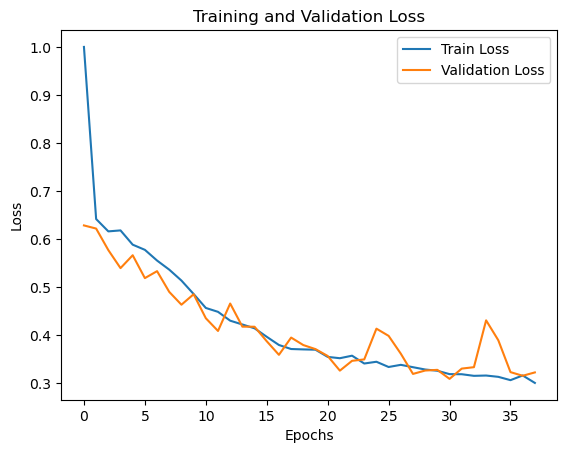

In [20]:
# Final Evaluation
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device).unsqueeze(1)
        outputs = model(images)
        preds = (outputs >= 0.5).float()
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Generate Classification Report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Cat", "Dog"]))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Plotting the losses
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [23]:
# Save the model's state_dict
torch.save(model.state_dict(), 'model.pth')

# Later for loading the model I have to do the following:
# Recreate the model architecture
#model = SmallCNN()  # Use the same class definition
#model.load_state_dict(torch.load('model.pth'))
#model.to(device)  # Move to the appropriate device
#model.eval()  # Set to evaluation mode

In [24]:
with open("train_losses.txt", "w") as file:
    for item in train_losses:
        file.write(str(item) + "\n")
with open("val_losses.txt", "w") as file:
    for item in val_losses:
        file.write(str(item) + "\n")